<a href="https://colab.research.google.com/github/Dany511/Bike_Demand_Prediction/blob/main/Bike_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Import Libraries**

In [290]:
import pandas as pd   #Data analysis and manipulation library
import math  #Used for mathematical functions
import numpy as np  #Used for working with arrays
import seaborn as sns #Used for data visualization
import matplotlib.pyplot as plt #Used for data visualization
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder,StandardScaler # Machine learning library
from sklearn.model_selection import train_test_split
import warnings # Used to avoid warning messages
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [291]:
df=pd.read_csv("SeoulBikeData.csv",encoding= 'unicode_escape')
# .head() function gives the preview of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [292]:
# Data shape
df.shape

(8760, 14)

In [293]:
# info() function is used to get information abouts the dataframe eg : Number of columns, Datatype of columns and Presence of NUll values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### There are 9 Numerical and 4 Categorical variables in the dataset

In [294]:
# Descriptive summary of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### For 'Rented Bike Count', 'Solar Radiation' , 'Temperature' etc the mean is greater than the median so the distribution is Right skewed and may contain Outliers. Lets check that out in the EDA part

## **Preprocessing the data**

## Check and Handle NULL values

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [295]:
# Check the Null values in the dataframe
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### There are no NULL values present in any of the columns

In [296]:
# Check duplicated values
df.duplicated().sum()

0

In [297]:

# Convert 'date' column to datetime format 
df['Date']=pd.to_datetime(df['Date'])
# Create seperate column for Day ,Month and Year
df['Day_name']=df['Date'].dt.day_name()
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [298]:
# Drop the date column 
df=df.drop('Date',axis=1)

In [299]:
def hour(h):
  if h >= 16 and h <= 21:
    return 'Evening'
  elif h >= 7 and h <= 11:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'  

In [300]:
# Create new column with  name 'label_day_night' and the store the day and night values 
df['label_day_night']=df['Hour'].apply(hour)

## **Exploratory Data Analysis**

## Outlier Detection

### Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

In [301]:
# Make list of all numerical columns
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_columns

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

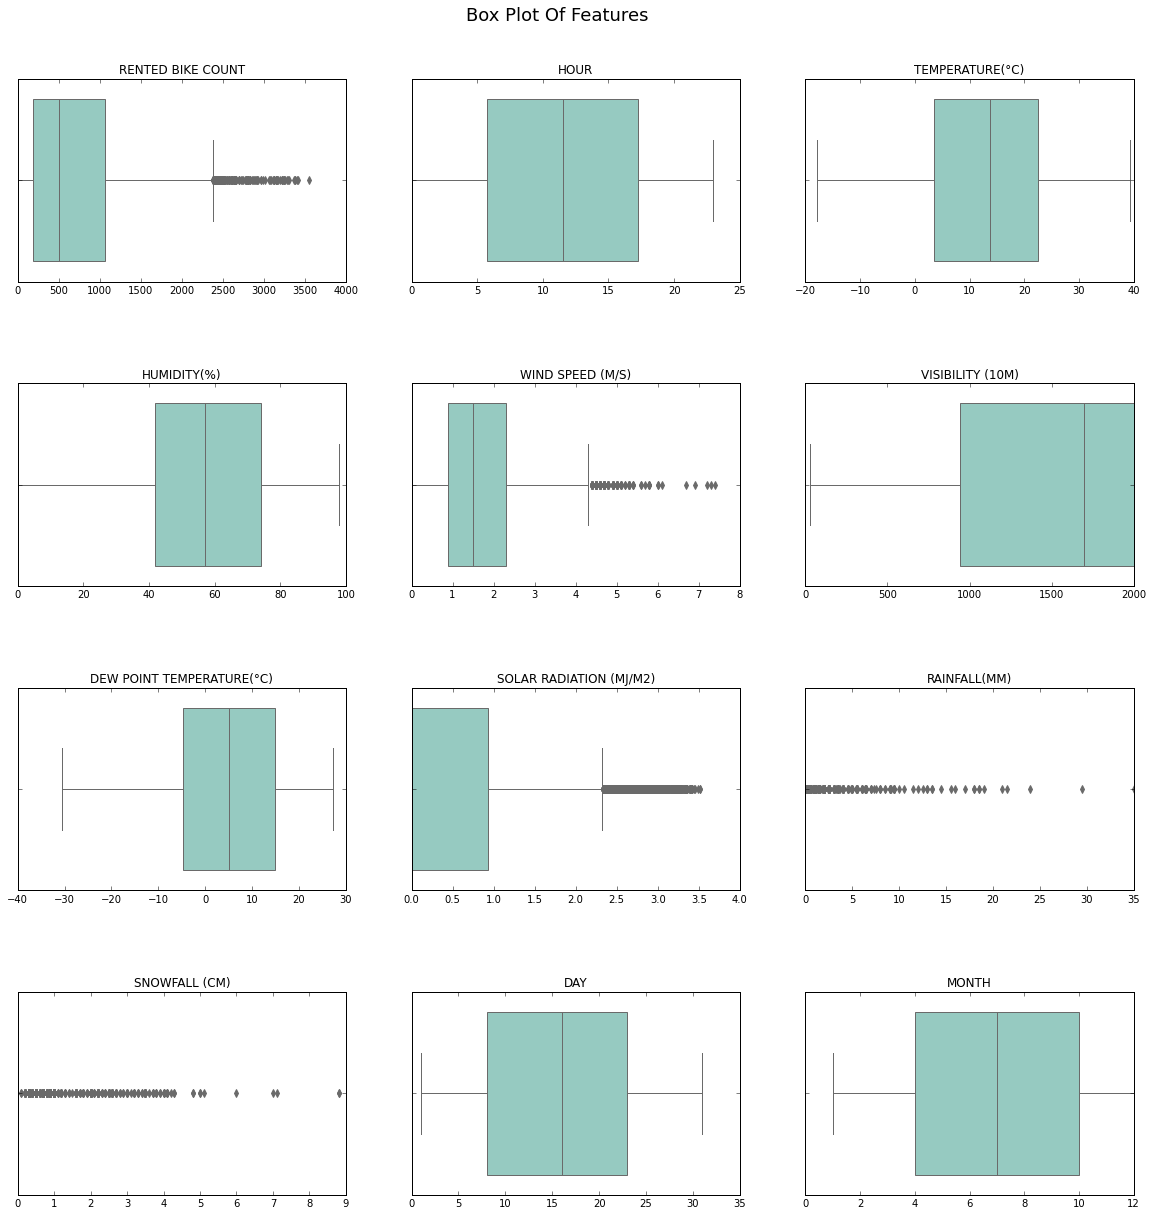

In [302]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Box Plot Of Features", fontsize=18, y=0.95)

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.boxplot(df[col],ax=ax,palette="Set3")

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

### When we observe the box plots above we can see that columns 'Rented Bike Count' , 'Wind Speed' , 'Solar Radiation' and 'Rainfall' have high values but the values may not be necessarily Outliers 

### 'Rented Bike Count' may have significantly large values when there is huge demand during office hours and  weekends

### 'Wind Speed' , 'Solar Radiation' and 'Rainfall' may have large values depending on the season. Solar Radiation can be high in Summer but low in winter. Same with case of Windspeed and Rainfall

### So I don't worry about outliers in the data

## Univariate Analysis

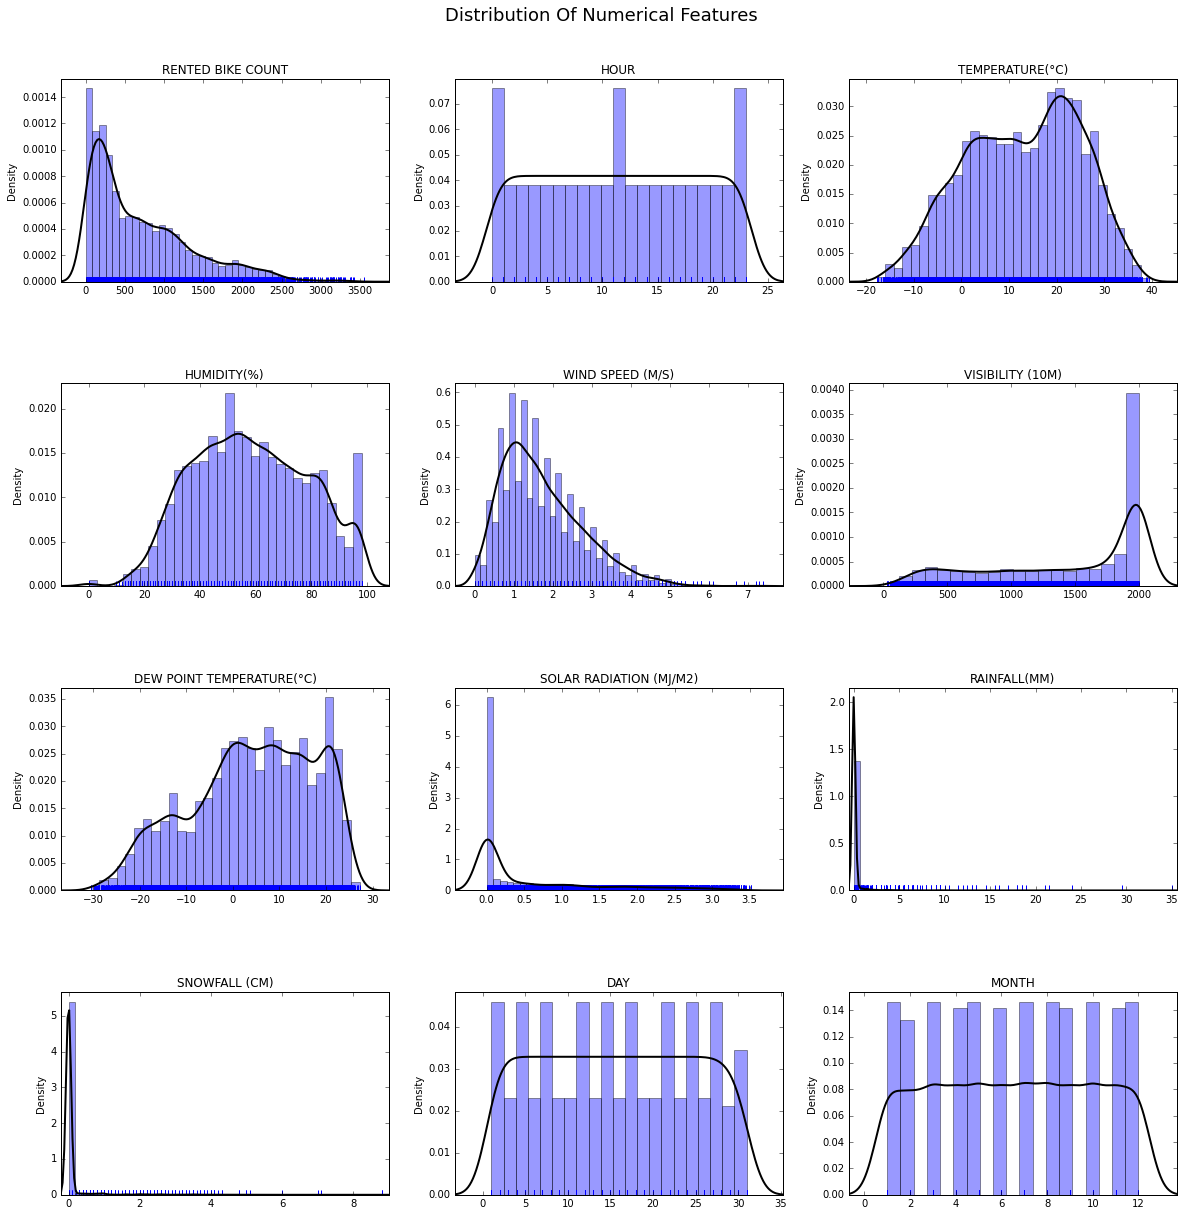

In [303]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution Of Numerical Features", fontsize=18, y=0.95)

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(x=df[col],ax=ax,rug=True, rug_kws={"color": "b"},kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

### The Distribution of 'Rented Bike Count' is Right (Positively) skewed. we will apply transformation and make the distribution close to Normal distribution

### The Distribution of Temperature, Humidity , Windspeed and Solar Radiation are pretty close to Normal distribution


## Correlation Heatmap

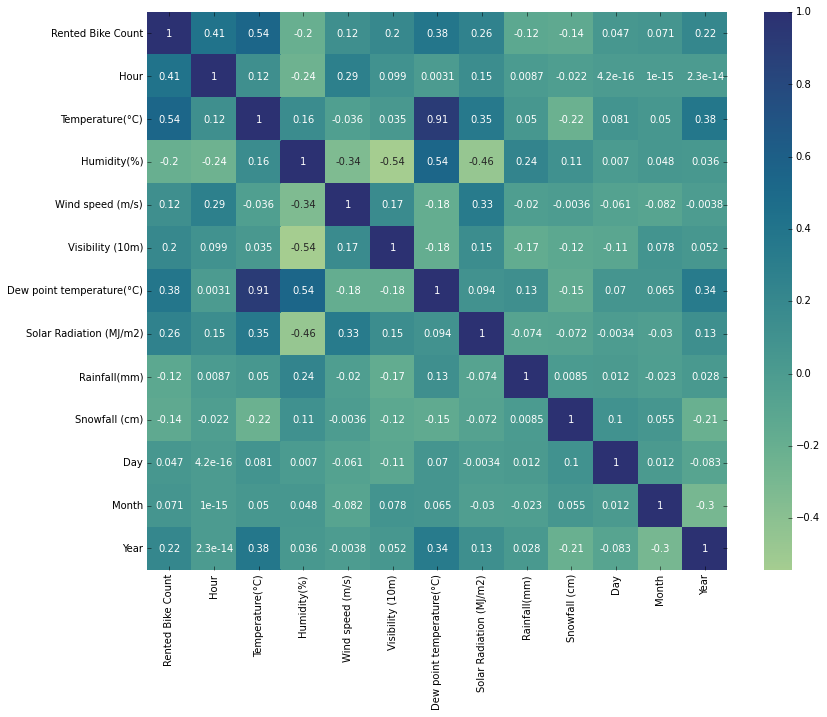

In [304]:
plt.figure(figsize=(13,10)) # Define figure size
sns.heatmap(df.corr(),annot=True,cmap='crest') # seaborn heatmap using correlation matrix

### From the correlation heatmap we can see that the Temperature and Dew point temperature have high correlation 0.91

### To remove multicollinearity between independent variables, I remove the Dew point temperature because it has less correlation with the dependent variable when compared with Temperature 

In [305]:
# Drop Dew point tempearture column 
df=df.drop('Dew point temperature(°C)',axis=1)

## Bivariate Analysis

In [306]:
# create a list of features 
features=list(df.columns)[:9]

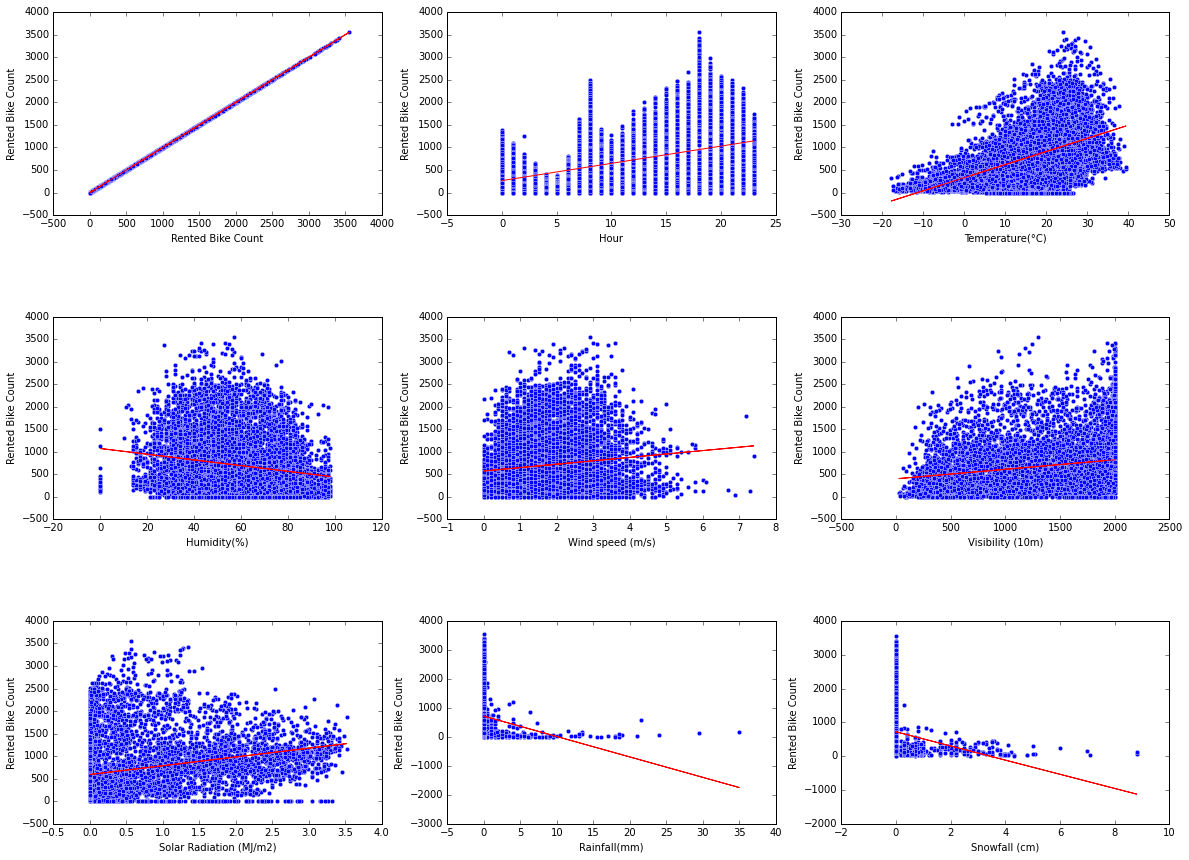

In [307]:
# Plot of Rented Bike Count vs other features
count=1 # initialize a variable
plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Scatterplots of all features", fontsize=18,y=0.95) # title of the plot
for col in features:
  plt.subplot(4,3,count)
  sns.scatterplot(df[col],df['Rented Bike Count']) # Scatterplot of Rented bike count vs other variables
  z=np.polyfit(df[col],df['Rented Bike Count'],1) # plots the trend line
  p=np.poly1d(z)
  plt.plot(df[col],p(df[col]),color="red")
  count+=1
plt.show()

### From the above regression plots we can say that some of our features are positively correlated and some of them are negatively correlated with our target variable ('Rented bike count')

In [308]:
# Correlation with Rented bike count
df.corr()['Rented Bike Count']

Rented Bike Count          1.000000
Hour                       0.410257
Temperature(°C)            0.538558
Humidity(%)               -0.199780
Wind speed (m/s)           0.121108
Visibility (10m)           0.199280
Solar Radiation (MJ/m2)    0.261837
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Day                        0.046849
Month                      0.070861
Year                       0.215162
Name: Rented Bike Count, dtype: float64

##  Hour , Temperature , Wind speed , Visibility , Solar Radiation are positively correlated with our target variable

## Humidity , Rainfall and Snowfall are negatively correlated

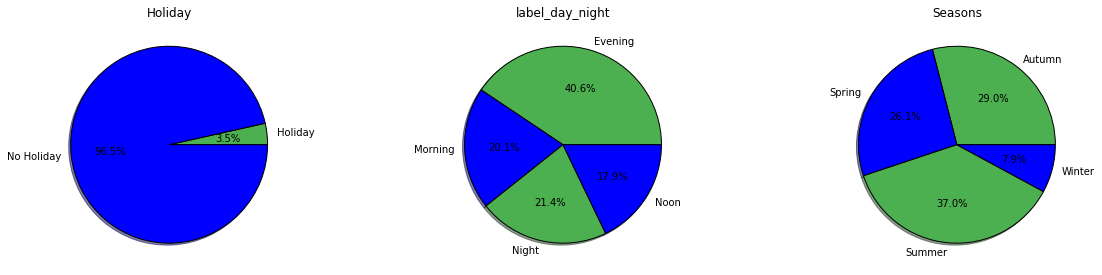

In [309]:
# Plot the distribution of Percentage of Rented bike count for all the categorical variables
Categorical_features=["Holiday",'label_day_night','Seasons'] # Make list of categorical columns
n=1
plt.figure(figsize=(20,15))
for i in Categorical_features: # Iterate through each feature
  plt.subplot(3,3,n)
  n=n+1
  plt.title(i) # Give a Title
  data=df.groupby(i)['Rented Bike Count'].sum()
  plt.pie(data,labels = data.keys().tolist(),shadow=True,colors=['#4CAF50','B'],autopct='%1.1f%%') # Pie plot
plt.show()

### Demand for Bikes is high on working days and low during holidays.This may be bacause of the people who use bikes to go to their work 

### As we see above demand is high in summer which is 37% followed by  Autumn 29.0% , spring 26.1% and Winter 7.9%

### Demand for bikes is high during evening from 16.00 hrs to 21.00 hrs and also in the morning during 8.00 hrs to 11.00 hrs

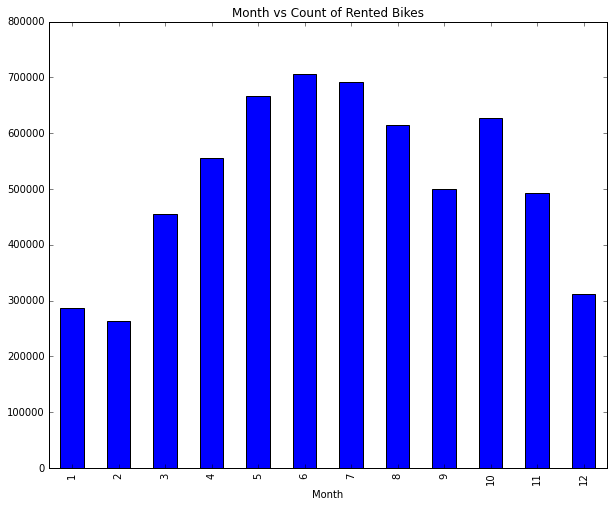

In [310]:
# Total Rented Bikes per each month
plt.figure(figsize=(10,8))
plt.title('Month vs Count of Rented Bikes')
plt.style.use('classic')
df.groupby('Month')['Rented Bike Count'].sum().plot(kind='bar',x='Month',y='Rented_Bikes') # bar plot of number of rented bikes per month

### In the month column we can see that demand is high in May, June and July during summer and low in December, January and february

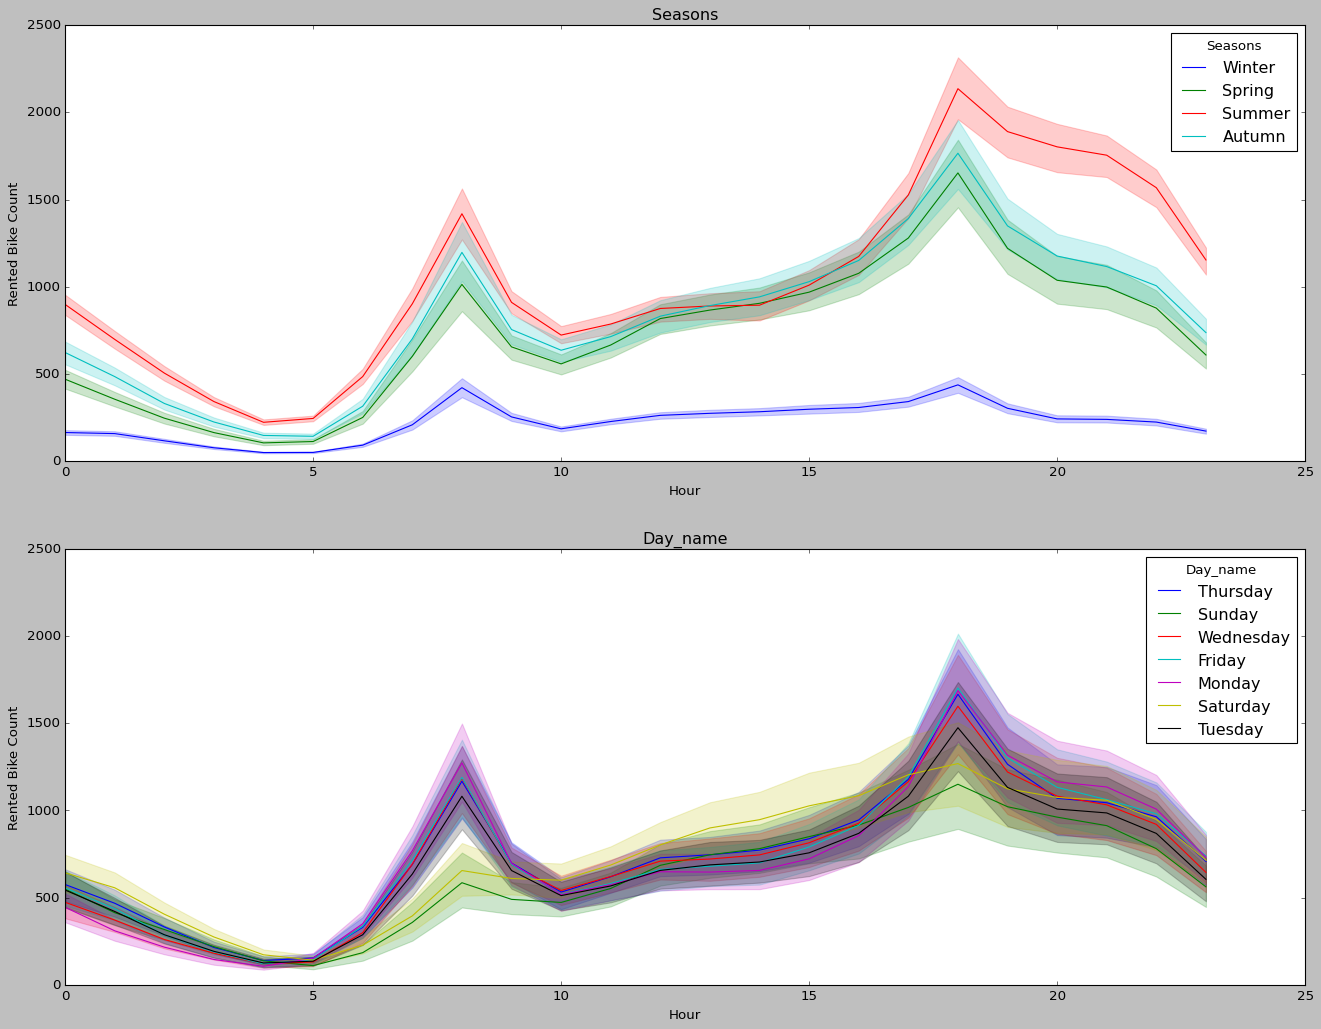

In [311]:
features=["Seasons","Day_name"]
n=1
plt.figure(figsize=(20,15))
for i in features: # Iterate through each feature
  plt.subplot(2,1,n)
  n=n+1
  plt.title(i)
  sns.lineplot(data=df,x='Hour',y='Rented Bike Count',hue=df[i])
plt.show()

### The demand is high at 8'o clock in the morning and 6'o clock in the evening this may be because of employees who go to work in the morning and return from work in the evening 

### Demand is high during weekdays at office hours(8.00 AM and 6.00 pM)but during weekends demand is more during 12.00 to 15.00 hrs when compared to weekdays



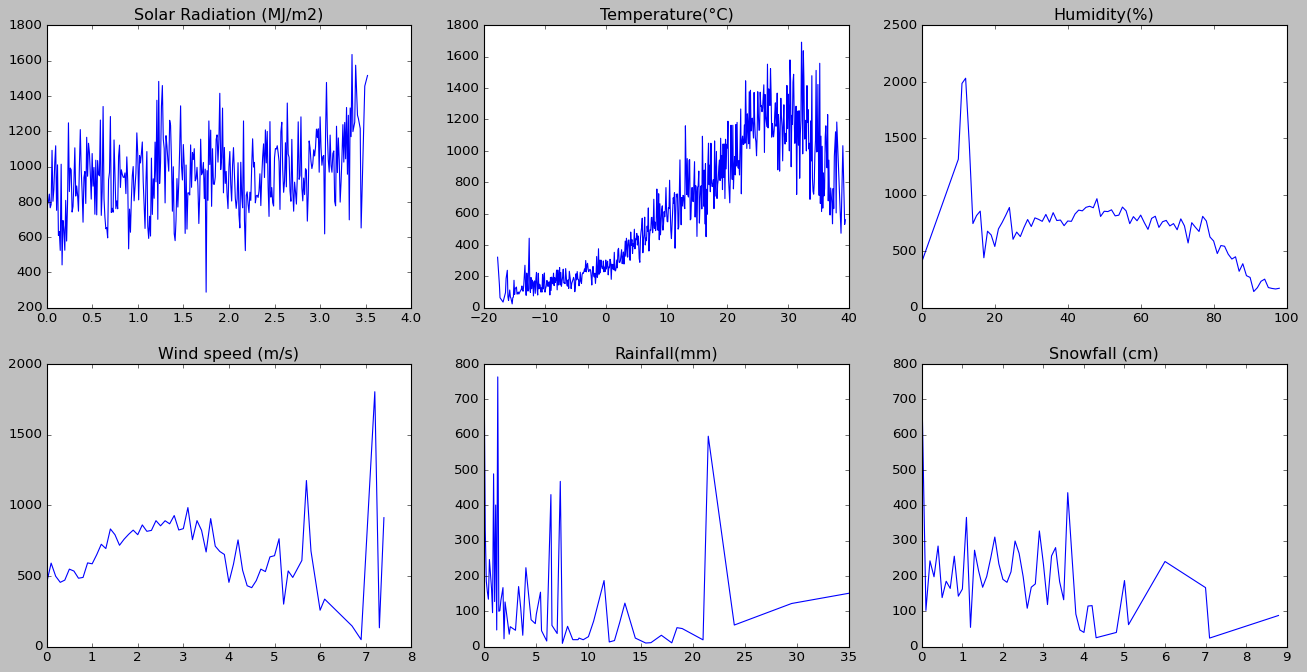

In [312]:
# Plot of Rented bike count vs weather
Weather_features=["Solar Radiation (MJ/m2)",'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)','Rainfall(mm)', 'Snowfall (cm)'] # Make list of weather related columns
n=1
plt.figure(figsize=(20,15))
for i in Weather_features: # Iterate through each feature
  plt.subplot(3,3,n)
  n=n+1
  plt.title(i) # Give a Title
  data=df.groupby(i).mean()['Rented Bike Count']
  plt.plot(data)
plt.show()

### We see a slightly increasing trend in the above plot. This shows that Rented Bike Count and Solar Radiation are positively correlated. This may be due to the peak demand for bikes during 15.00 hrs to 20.00 hrs

### From the above we can see that in general, more people tend to prefer biking at moderate to high temperatures: however if the temperature is too hot( T > 35°C) there is a small decline in the demand

### Generally people rent bike when there is no rainfall, The peak at 23mm occured may be because of the sudden change in weather with heavy rainfall in the same hour 

### From the plot we can see that people prefer to rent bike when the whether is clear and sunny with no snowfall

## **Feature Engineering**

Label encoding is converting categorical features to numerical features so as to convert them into machine readable form

In [313]:
# Encoding categorical columns 'Holiday' and 'Functioning Day' with Labelencoder
le=LabelEncoder() # create a object of label encoder
df['Holiday']=le.fit_transform(df['Holiday'])
df['Functioning Day']=le.fit_transform(df['Functioning Day'])
df['Year']=le.fit_transform(df['Year']) 

In [314]:
# Create dummies for "Seasons" column
seasons_day=pd.get_dummies(df[['Seasons','Day_name']])
df=pd.concat([df.drop(['Seasons'],axis=1),seasons_day],axis=1) # Add the dummies to the dataset using concat function

In [315]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_name_Friday,Day_name_Monday,Day_name_Saturday,Day_name_Sunday,Day_name_Thursday,Day_name_Tuesday,Day_name_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,0,0


## Transformations on Rented bike count

### Previously we saw that our dependent variable ie Rented bike count is right skewed. Now we will try some transformation and make it as close to Normal distribution

Text(0.5, 1.0, 'Square root')

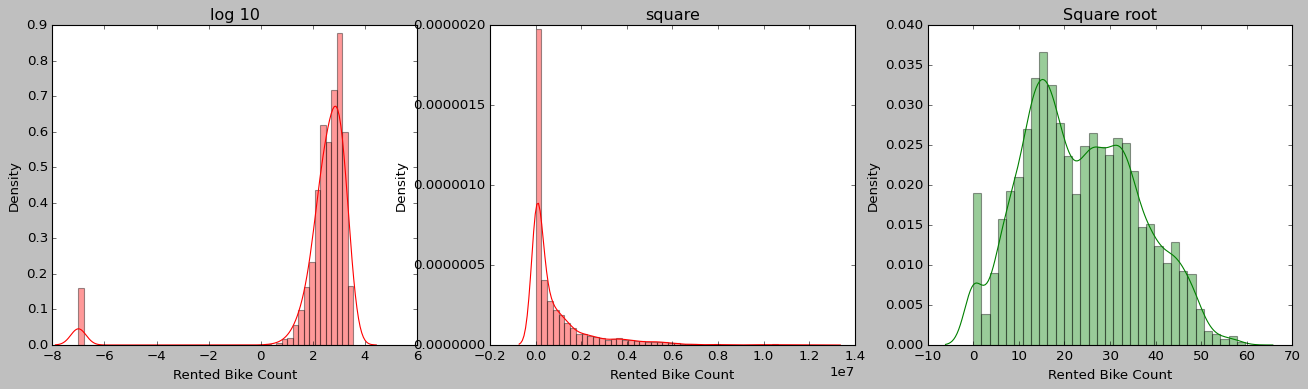

In [316]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# use log10 
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# use square 
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
# use square root 
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

### After the square root transformation the data in the 3rd plot is normalized to some extent. So we will choose square root transformation

In [317]:
# Apply square root transformation and store the values in y
y=(df['Rented Bike Count'])**0.5

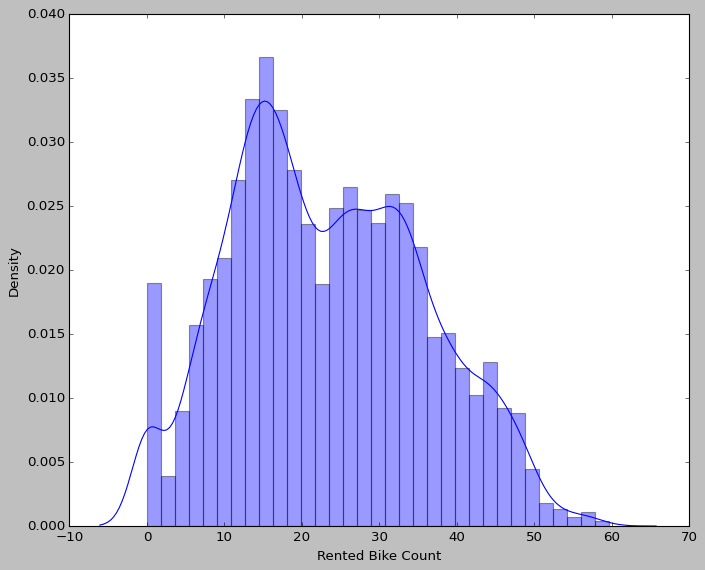

In [318]:
# Distrbution plot of y
plt.figure(figsize=(10,8))
sns.distplot(y)

In [319]:
# Columns
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Day_name', 'Day', 'Month', 'Year', 'label_day_night', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Day_name_Friday',
       'Day_name_Monday', 'Day_name_Saturday', 'Day_name_Sunday',
       'Day_name_Thursday', 'Day_name_Tuesday', 'Day_name_Wednesday'],
      dtype='object')

In [320]:
# Selecting the features for creating a model
features=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Month', 'Year', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Day_name_Friday',
       'Day_name_Monday', 'Day_name_Saturday', 'Day_name_Sunday',
       'Day_name_Thursday', 'Day_name_Tuesday', 'Day_name_Wednesday']

In [321]:
# Create a dataframe X with appropriate features
X=df[features]

In [322]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_name_Friday,Day_name_Monday,Day_name_Saturday,Day_name_Sunday,Day_name_Thursday,Day_name_Tuesday,Day_name_Wednesday
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,...,0,0,1,0,0,0,0,1,0,0


## **Standardization**

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [323]:
# Apply Standardization on X
sc=StandardScaler() # Create object for standardscaler
X=sc.fit_transform(X)

## **Model Building**

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [325]:
linear_regression=LinearRegression() # Create a object of Linear Regression
linear_regression.fit(x_train,y_train) # fit the model
predictions=linear_regression.predict(x_test) # Predict the count of bikes

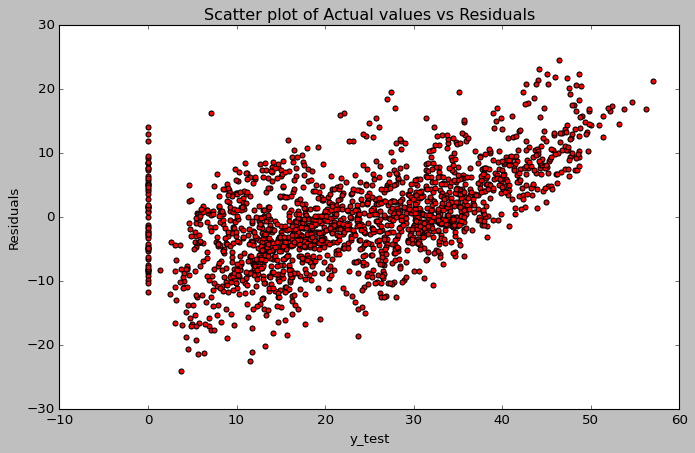

In [326]:
# Check for Homoscedasticity
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test-predictions, c='r')
plt.title('Scatter plot of Actual values vs Residuals')
plt.ylabel("Residuals")
plt.xlabel("y_test")
plt.show()

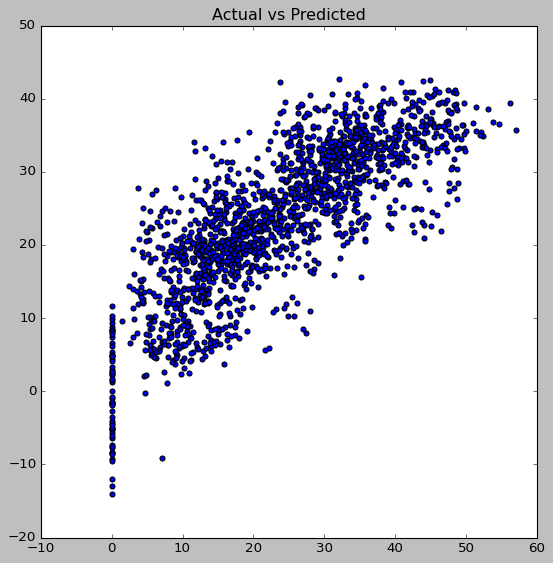

In [327]:
# Plot of Actual vs Predicted values
plt.figure(figsize=(8,8))
plt.title("Actual vs Predicted")
plt.scatter(y_test,predictions)

In [328]:
Training_Score=[]
RMSE=[]
MSE=[]
R2=[]
Adj_R2=[]

In [329]:
training_score=linear_regression.score(x_train,y_train)
print("Training Score : ",training_score)
rmse=math.sqrt(mean_squared_error(y_test,predictions))
print("Root_Mean_Squared_Error = ", rmse)
mse=mean_squared_error(y_test,predictions)
print("Mean_Squared_Error = ",mse)
r2=r2_score(y_test,predictions)
print("R-Squared = ",r2)
adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_R2 = ",adj_r2)

  
MSE.append(mse)
RMSE.append(rmse)
Training_Score.append(training_score)
R2.append(r2)
Adj_R2.append(adj_r2)

Training Score :  0.6564367793934631
Root_Mean_Squared_Error =  7.286036566385434
Mean_Squared_Error =  53.08632884670564
R-Squared =  0.6524835592012341
Adjusted_R2 =  0.6478580510193062
